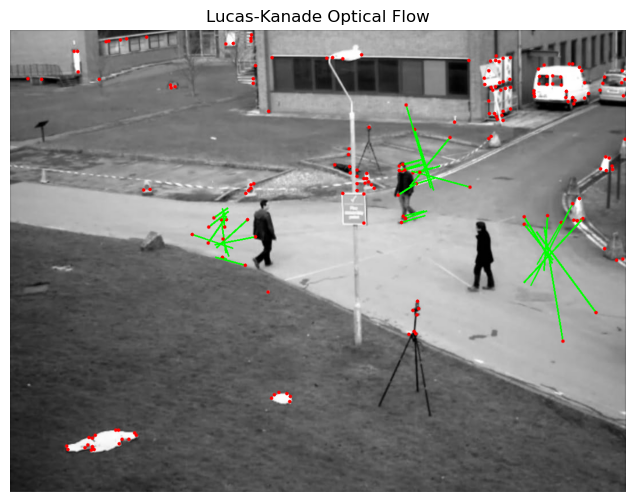

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('f1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('f2.jpg', cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    raise ValueError("One or both images failed to load. Check file paths.")

if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

feature_params = dict(maxCorners=200,
                      qualityLevel=0.01,
                      minDistance=5,
                      blockSize=7)

p0 = cv2.goodFeaturesToTrack(img1, mask=None, **feature_params)

if p0 is None:
    raise ValueError("No features found in the first image. Try adjusting feature_params.")

lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

p1, st, err = cv2.calcOpticalFlowPyrLK(img1, img2, p0, None, **lk_params)

good_new = p1[st == 1]
good_old = p0[st == 1]

img2_color = cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB)

for (new, old) in zip(good_new, good_old):
    a, b = new.ravel()
    c, d = old.ravel()
    cv2.line(img2_color, (int(c), int(d)), (int(a), int(b)), (0, 255, 0), 2)
    cv2.circle(img2_color, (int(a), int(b)), 3, (255, 0, 0), -1)

plt.figure(figsize=(10, 6))
plt.imshow(img2_color)
plt.title('Lucas-Kanade Optical Flow')
plt.axis('off')
plt.show()


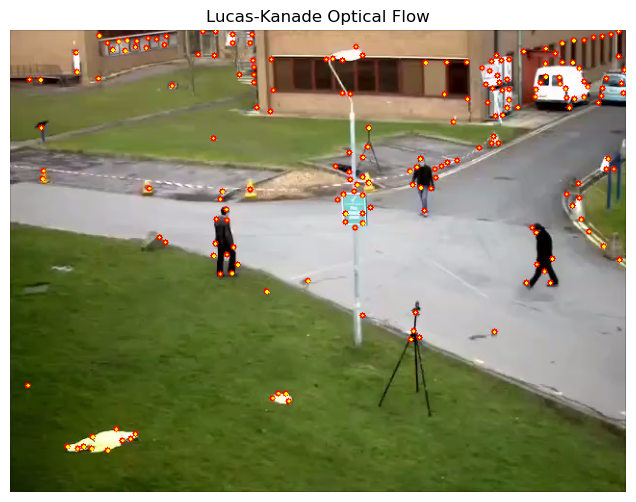

In [2]:
cap = cv2.VideoCapture('video.mp4')  
if not cap.isOpened():
    raise IOError("Couldn't open video file. Check the path and file name.")

feature_params = dict(maxCorners=200,
                      qualityLevel=0.01,
                      minDistance=7,
                      blockSize=7)

lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

mask = np.zeros_like(old_frame)

plt.ion()
fig, ax = plt.subplots(figsize=(10, 6))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    if p1 is None or st is None:
        print("No points to track.")
        break

    good_new = p1[st == 1]
    good_old = p0[st == 1]

    for (new, old) in zip(good_new, good_old):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(c), int(d)), (int(a), int(b)), (0, 255, 0), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 3, (0, 0, 255), -1)

    img = cv2.add(frame, mask)

    ax.clear()
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title("Lucas-Kanade Optical Flow")
    ax.axis("off")
    plt.pause(0.001)

    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cap.release()
plt.ioff()
plt.show()
